In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import random
%matplotlib inline

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error as mse, r2_score as r2
from sklearn import tree
from sklearn.metrics import accuracy_score

import missingno 
from IPython.display import Image
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams.update({'font.size': 14})

## Loading dataset

In [2]:
from sklearn.datasets import load_breast_cancer
breast = load_breast_cancer()
X = pd.DataFrame(breast.data, columns=breast.feature_names)
Y = pd.Series(breast.target)

In [3]:
X['target'] = Y
X = X.sample(frac=1, random_state=42)
X_train = X[:426]
X_test = X[426:]
y_tr = X_train['target']
X_tr = X_train.drop('target', axis=1)
y_te = X_test['target']
X_te = X_test.drop('target', axis=1)

## EDA

In [4]:
print(breast.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
X_train.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,...,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,14.063474,19.307183,91.542535,648.265258,0.095975,0.104078,0.088152,0.048264,0.181343,0.062922,...,25.720634,106.855493,872.460329,0.131784,0.254023,0.270945,0.112805,0.291710,0.083944,0.645540
std,3.500312,4.231314,24.162558,342.195001,0.013969,0.053856,0.080869,0.039215,0.028517,0.007179,...,6.010150,33.691864,559.553096,0.022607,0.155277,0.210367,0.065666,0.063598,0.018126,0.478912
min,6.981000,10.380000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.490000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.612500,16.330000,74.667500,413.300000,0.086012,0.064738,0.028835,0.020195,0.161800,0.057802,...,21.417500,83.780000,506.450000,0.116200,0.147900,0.116725,0.064345,0.250700,0.071827,0.000000
50%,13.320000,18.880000,85.995000,546.350000,0.095830,0.090945,0.060070,0.032570,0.177950,0.061580,...,25.425000,97.455000,682.000000,0.130100,0.216250,0.226350,0.097000,0.283550,0.080195,1.000000
75%,15.750000,21.695000,103.550000,771.775000,0.104750,0.129675,0.127075,0.070252,0.194950,0.066320,...,29.237500,125.075000,1087.000000,0.145075,0.330650,0.379550,0.157250,0.319600,0.092053,1.000000
max,27.220000,39.280000,182.100000,2250.000000,0.144700,0.345400,0.426800,0.201200,0.304000,0.097440,...,47.160000,229.300000,3432.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 426 entries, 204 to 525
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              426 non-null    float64
 1   mean texture             426 non-null    float64
 2   mean perimeter           426 non-null    float64
 3   mean area                426 non-null    float64
 4   mean smoothness          426 non-null    float64
 5   mean compactness         426 non-null    float64
 6   mean concavity           426 non-null    float64
 7   mean concave points      426 non-null    float64
 8   mean symmetry            426 non-null    float64
 9   mean fractal dimension   426 non-null    float64
 10  radius error             426 non-null    float64
 11  texture error            426 non-null    float64
 12  perimeter error          426 non-null    float64
 13  area error               426 non-null    float64
 14  smoothness error        

<AxesSubplot:>

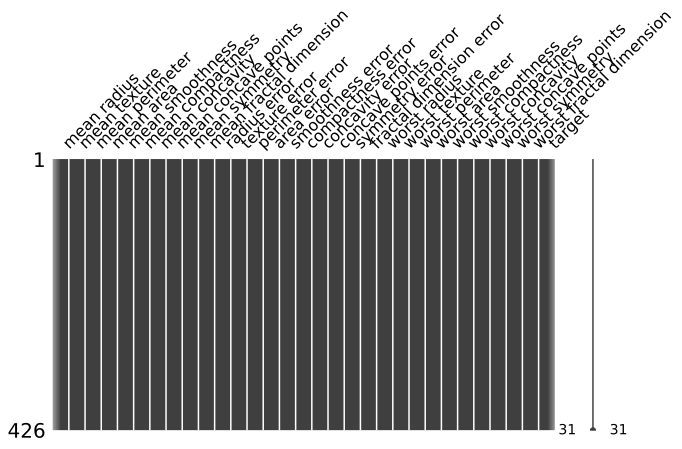

In [7]:
missingno.matrix(X_train, figsize = (10,5))

All features in the dataset are numerical. There are no missing values to fill in.

## Decision Tree Classifier

In [8]:
class MyDecisionTree():
    
    def __init__(self, x_df, y_df, max_depth, min_samples_leaf):
        
        self.data = x_df
        self.data['target'] = y_df
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.tree = None
        
    # Build_tree initiates the first split and creates the next nodes by calling the node function.
    
    def build_tree(self):
    
        self.tree = self.split(self.data)
        self.tree['left'] = self.node(self.tree['left'], 1)
        self.tree['right'] = self.node(self.tree['right'], 1)
    
    # The node function checks if we have reached the max_depth and splits the node if not.
    # It also calls the get_value function if there is nothing to split anymore or max_depth has been reached.
    
    def node(self, data, depth):
        
        if depth < self.max_depth:
            nodes = self.split(data)
            if nodes == 'no_split':
                return self.get_value(data)
            else:
                nodes['left'] = self.node(nodes['left'], depth+1)
                nodes['right'] = self.node(nodes['right'], depth+1)
                return nodes
        
        if depth == self.max_depth:
            return self.get_value(data)
    
    # The split function iterates trough all the values of all the features in the dataset, 
    # at each step devides the dataset into two subsets according to the current value,
    # calls the inf_gain function (calculates the information gain) and store 
    # the feature name, the treshold value and the subsets when the information gain is the biggest and 
    # the number of samples in each subset more than min_samples_leaf.
    # If the information gain hasn't increased, the function returns 'no_split'.
    
    def split(self, data):
    
        max_ig = 0
        split = 'no_split'
        for feature in data.columns[:-1]:
            for treshold in data[feature]:
                left = data.loc[data[feature] <= treshold]
                right = data.loc[data[feature] > treshold]
                ig = self.inf_gain(data, left, right)
                if ig > max_ig and len(left) >= self.min_samples_leaf and len(right) >= self.min_samples_leaf:
                    max_ig = ig
                    split = {'feature': feature, 'treshold': treshold, 'left': left, 'right': right}
        return split
    
    # The inf_gain function calculates the gini impurity before and after splitting 
    # the dataset and measures the information gain by comparing these levels.
    
    def inf_gain(self, data, left, right):
        
        def gini(data):
            if len(data['target'].value_counts()) == 2:
                return 1 - ((data['target'].value_counts()[0]/len(data['target']))**2) - ((data['target'].value_counts()[1]/len(data['target']))**2)
            else:
                return 0
        
        g0 = gini(data)
        gl = gini(left)
        gr = gini(right)
        gtotal = len(left['target'])/len(data['target']) * gl + len(right['target'])/len(data['target']) * gr
        inf_gain = g0 - gtotal 
        
        return inf_gain
    
    # The get_value function returns the most common class value that the given node contains.
    
    def get_value(self, data):
    
        return data['target'].mode().iloc[0] 

    # The predict function iterates trough the test data, calls the each_row function for each row
    # and stores the predictions in a list.
    
    def predict(self, data):
    
        prediction = []
        for i in range(len(data)):
            sample = data.iloc[i]
            prediction.append(self.each_row(sample, self.tree))
        return prediction
    
    # The each_row function compares the value of the test data with the threshold from the built tree: 
    # if it is less then the treshold, it goes to the left subtree, otherwise - to the right.
    # If there is no subtree anymore, the function returns the predicted value.
    
    def each_row(self, sample, tree):
    
        if sample[tree['feature']] <= tree['treshold']:
            if type(tree['left']) == dict:
                return self.each_row(sample, tree['left'])
            else:
                return tree['left']
        else:
            if type(tree['right']) == dict:
                return self.each_row(sample, tree['right'])
            else:
                return tree['right']
    
    # The get_tree function returns information about the generated decision tree.
    
    def get_tree(self):
        
        return self.tree
    

In [9]:
Xx_tr = X_tr.copy()

In [10]:
mytree = MyDecisionTree(Xx_tr, y_tr, 
                        max_depth=8,
                        min_samples_leaf=5)
mytree.build_tree()

In [11]:
pred_train = mytree.predict(X_tr)
pred_test = mytree.predict(X_te)

In [12]:
print(f'accuracy on the training dataset: {accuracy_score(y_tr, pred_train)}')
print(f'accuracy on the testing dataset: {accuracy_score(y_te, pred_test)}')

accuracy on the training dataset: 0.9812206572769953
accuracy on the testing dataset: 0.965034965034965


Let's see how sclearn model performs 

In [13]:
dt = DecisionTreeClassifier(max_depth=8,
                           min_samples_leaf=5,
                           random_state=42)
dt.fit(X_tr, y_tr)
train_pred = dt.predict(X_tr)
test_pred = dt.predict(X_te)

In [14]:
print(f'accuracy on the training dataset: {accuracy_score(y_tr, train_pred)}')
print(f'accuracy on the testing dataset: {accuracy_score(y_te, test_pred)}')

accuracy on the training dataset: 0.9812206572769953
accuracy on the testing dataset: 0.965034965034965


Awesome 😎 

## Random Forest

To build a random forest we need to alter the Decision tree model a little bit:

- to add new hyperparameters: n_estimators, max_features;
- each new tree should learn from the bootstrapped data;
- at each split the algorithm should consider max_features random features of the original data;
- the algorithm has to build n_estimators trees and store them;
- prediction must be formed as the most common class value from all the trees' predictions;
- we will use such characteristics of object-oriented programming as inheritance and polymorphism;

In [15]:
class MyRandomForest(MyDecisionTree):
    
     # adding some new hyperparameters
        
    def __init__(self, x_df, y_df, max_depth, min_samples_leaf, n_estimators, max_features):
        super().__init__(x_df, y_df, max_depth, min_samples_leaf)
        self.n_estimators = n_estimators
        self.max_features = max_features
        self.forest = None
    
    # bootstrapping the original data for creating multiple different models from a single training dataset
    
    def build_trees(self):
        
        self.forest = []
        n = 0
        while n < self.n_estimators:
            n += 1
            bootstrapped_data = self.data.sample(frac=1, replace=True)
            tree = self.split(bootstrapped_data)
            tree['left'] = self.node(tree['left'], 1)
            tree['right'] = self.node(tree['right'], 1)
            self.forest.append(tree)
    
    # taking the most common class value from all the trees' predictions
    
    def predict(self, data):
    
        tree_preds = []
        for tree in self.forest:
            single_tr_pred = []
            for i in range(len(data)):
                sample = data.iloc[i]
                single_tr_pred.append(self.each_row(sample, tree))
            tree_preds.append(single_tr_pred)
        
        forest_pred = []
        for i in range(len(tree_preds[0])):
            obj = []
            for j in range(len(tree_preds)):
                obj.append(tree_preds[j][i])
            if obj.count(1) > obj.count(0):
                forest_pred.append(1)
            else:
                forest_pred.append(0)
                
        return forest_pred
        
    def get_forest(self):
        
        return self.forest
    

In [16]:
Xx_tr = X_tr.copy()

In [17]:
%%time
rf = MyRandomForest(Xx_tr, y_tr, 
                    max_depth=4, 
                    n_estimators=10,
                    min_samples_leaf=2,
                    max_features=15)
rf.build_trees()

CPU times: user 9min 20s, sys: 4.39 s, total: 9min 24s
Wall time: 9min 21s


In [18]:
pred_train = rf.predict(X_tr)
pred_test = rf.predict(X_te)

In [19]:
print(f'accuracy on the training dataset: {accuracy_score(y_tr, pred_train)}')
print(f'accuracy on the testing dataset: {accuracy_score(y_te, pred_test)}')

accuracy on the training dataset: 0.9788732394366197
accuracy on the testing dataset: 0.9300699300699301


Let's see what sclearn random forest can give us

In [20]:
clf = RandomForestClassifier(max_depth=4, 
                            max_features=15, 
                            n_estimators=10,
                            min_samples_leaf=2,
                            random_state=43)
clf.fit(X_tr, y_tr)
train_pred = clf.predict(X_tr)
test_pred = clf.predict(X_te)

In [21]:
print(f'accuracy on the training dataset: {accuracy_score(y_tr, train_pred)}')
print(f'accuracy on the testing dataset: {accuracy_score(y_te, test_pred)}')

accuracy on the training dataset: 0.9835680751173709
accuracy on the testing dataset: 0.951048951048951


Pretty good 😌 